In [1]:
#Import libraries & ignore the warnings
!pip install tensorflow
!pip install scikit-learn
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#reading dataset
churndata = pd.read_csv(r"C:\Users\CarolD\Downloads\Customer-Churn-Data.csv")

In [5]:
churndata

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0       15634602          619    France  Female   42       2       0.00   
1       15647311          608     Spain  Female   41       1   83807.86   
2       15619304          502    France  Female   42       8  159660.80   
3       15701354          699    France  Female   39       1       0.00   
4       15737888          850     Spain  Female   43       2  125510.82   
...          ...          ...       ...     ...  ...     ...        ...   
9995    15606229          771    France    Male   39       5       0.00   
9996    15569892          516    France    Male   35      10   57369.61   
9997    15584532          709    France  Female   36       7       0.00   
9998    15682355          772   Germany    Male   42       3   75075.31   
9999    15628319          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Complain  SatisfactionScore  CardType  
0            1                  2   DIAMOND  
1            1                  3   DIAMOND  
2            1                  3   DIAMOND  
3            0                  5      GOLD  
4            0                  5      GOLD  
...        ...                ...       ...  
9995         0                  1   DIAMOND  
9996         0                  5  PLATINUM  
9997         1                  3    SILVER  
9998         1                  2      GOLD  
9999         0                  3   DIAMOND  

[10000 rows x 15 columns]

In [9]:
data=churndata

In [11]:
# identify categorical columns in the DataFrame
category = [i for i in data.columns if data[i].dtype == 'object']

# iterate over each categorical column
for col in category:
    # print the value counts for the current column
    print(data[col].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64

CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64



In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
!pip install category_encoders
import category_encoders as ce

#Category and numeric data
category = [i for i in data.columns if data[i].dtype == 'object']
numerical = [i for i in data.columns if data[i].dtype != 'object']

#encode category data into numeric
def encode_data(data, columns, method):
    #one-hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix=columns)
        data = pd.concat([data, encoded_columns], axis=1)
        data.drop(columns, axis=1, inplace=True)   
        #ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)
    return data


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
ordinal_columns = ['Geography','Gender','CardType']

data = data.copy()

#encode 'ordinal_columns'
data = encode_data(data, ordinal_columns, method='ordinal')

data

CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0       15634602          619          0       0   42       2       0.00   
1       15647311          608          2       0   41       1   83807.86   
2       15619304          502          0       0   42       8  159660.80   
3       15701354          699          0       0   39       1       0.00   
4       15737888          850          2       0   43       2  125510.82   
...          ...          ...        ...     ...  ...     ...        ...   
9995    15606229          771          0       1   39       5       0.00   
9996    15569892          516          0       1   35      10   57369.61   
9997    15584532          709          0       0   36       7       0.00   
9998    15682355          772          1       1   42       3   75075.31   
9999    15628319          792          0       0   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1                 1          0               1        112542.58       0   
2                 3          1               0        113931.57       1   
3                 2          0               0         93826.63       0   
4                 1          1               1         79084.10       0   
...             ...        ...             ...              ...     ...   
9995              2          1               0         96270.64       0   
9996              1          1               1        101699.77       0   
9997              1          0               1         42085.58       1   
9998              2          1               0         92888.52       1   
9999              1          1               0         38190.78       0   

      Complain  SatisfactionScore  CardType  
0            1                  2         0  
1            1                  3         0  
2            1                  3         0  
3            0                  5         1  
4            0                  5         1  
...        ...                ...       ...  
9995         0                  1         0  
9996         0                  5         2  
9997         1                  3         3  
9998         1                  2         1  
9999         0                  3         0  

[10000 rows x 15 columns]

In [17]:
print(data.shape)

(10000, 15)


In [19]:
#View data
data.head()

CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0    15634602          619          0       0   42       2       0.00   
1    15647311          608          2       0   41       1   83807.86   
2    15619304          502          0       0   42       8  159660.80   
3    15701354          699          0       0   39       1       0.00   
4    15737888          850          2       0   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Complain  SatisfactionScore  CardType  
0         1                  2         0  
1         1                  3         0  
2         1                  3         0  
3         0                  5         1  
4         0                  5         1

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Geography          10000 non-null  int32  
 3   Gender             10000 non-null  int32  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Complain           10000 non-null  int64  
 13  SatisfactionScore  10000 non-null  int64  
 14  CardType           10000 non-null  int32  
dtypes: float64(2), int32(3), int64(10)
memory usage: 1.0 MB


In [23]:
#Total customers who exited and total customers who remained
print("*********CHURNED:************\n")
print("Total customers who exited")
print((data.Exited == 1).sum())
print("Total active customers")
print((data.Exited == 0).sum())

*********CHURNED:************

Total customers who exited
2038
Total active customers
7962


In [25]:
#Customers per class
data.Exited.value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

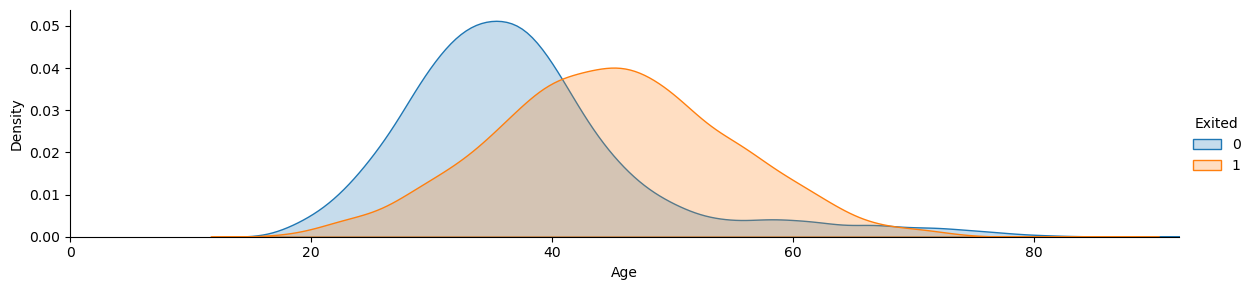

In [29]:
#Plot distribution of age of customers who churned or did not churn
a = sns.FacetGrid( data, hue = 'Exited', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data['Age'].max()))
a.add_legend()

In [31]:
sns.set_theme(style="whitegrid")

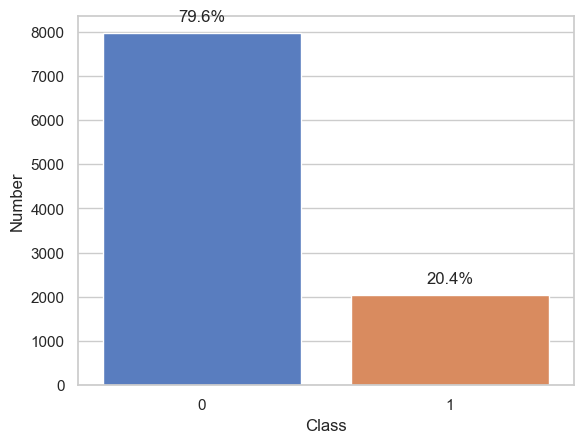

In [33]:
#Customers per class %
g = sns.countplot(x='Exited', data=data, palette='muted')
g.set(ylabel='Number', xlabel='Class')
plt.xticks([0, 1], fontsize=11)
total = len(data['Exited'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200), \
                            ha='center', va='bottom', fontsize=12)
plt.show()

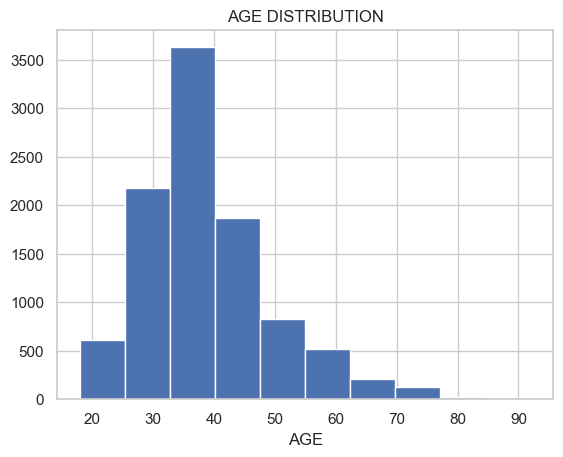

In [35]:
#Age Distribution
plt.hist(data['Age'])
plt.xlabel("AGE")
plt.title("AGE DISTRIBUTION")
plt.show()

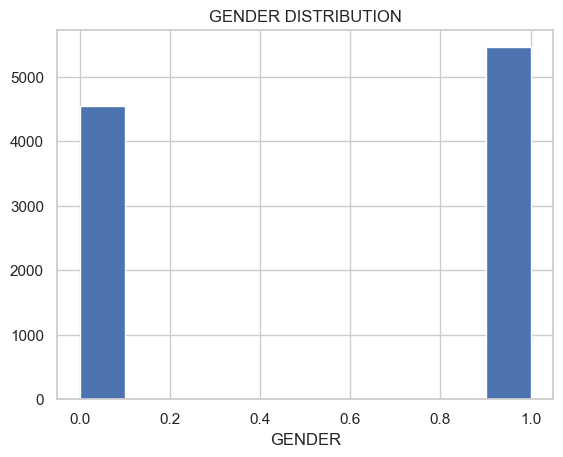

In [37]:
#Gender Distribution
plt.hist(data['Gender'])
plt.xlabel("GENDER")
plt.title("GENDER DISTRIBUTION")
plt.show()

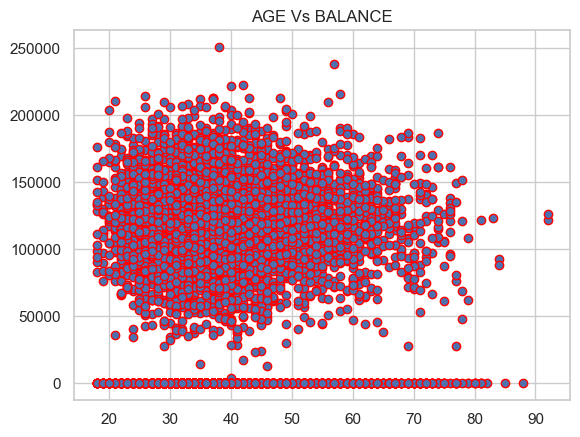

In [39]:
#Age V Total Amount
plt.scatter(data['Age'], data['Balance'],edgecolors='Red')
plt.title("AGE Vs BALANCE")
plt.show()

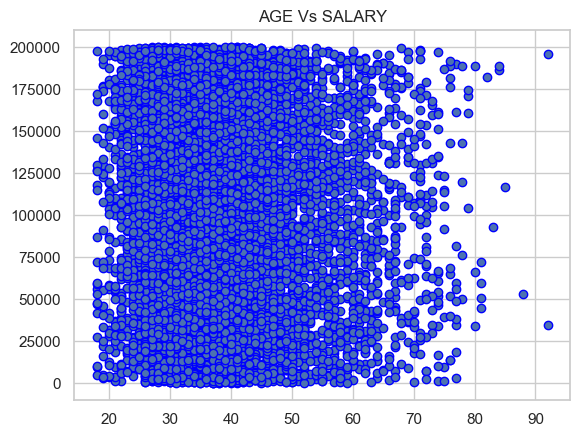

In [43]:
#Age V Total Amount
plt.scatter(data['Age'], data['EstimatedSalary'],edgecolors='Blue')
plt.title("AGE Vs SALARY")
plt.show()

In [45]:
data.skew()

CustomerId           0.001149
CreditScore         -0.071607
Geography            0.500916
Gender              -0.183596
Age                  1.011320
Tenure               0.010991
Balance             -0.141109
NumOfProducts        0.745568
HasCrCard           -0.901812
IsActiveMember      -0.060437
EstimatedSalary      0.002085
Exited               1.470845
Complain             1.466263
SatisfactionScore   -0.008936
CardType             0.002649
dtype: float64

In [47]:
data.Gender.value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

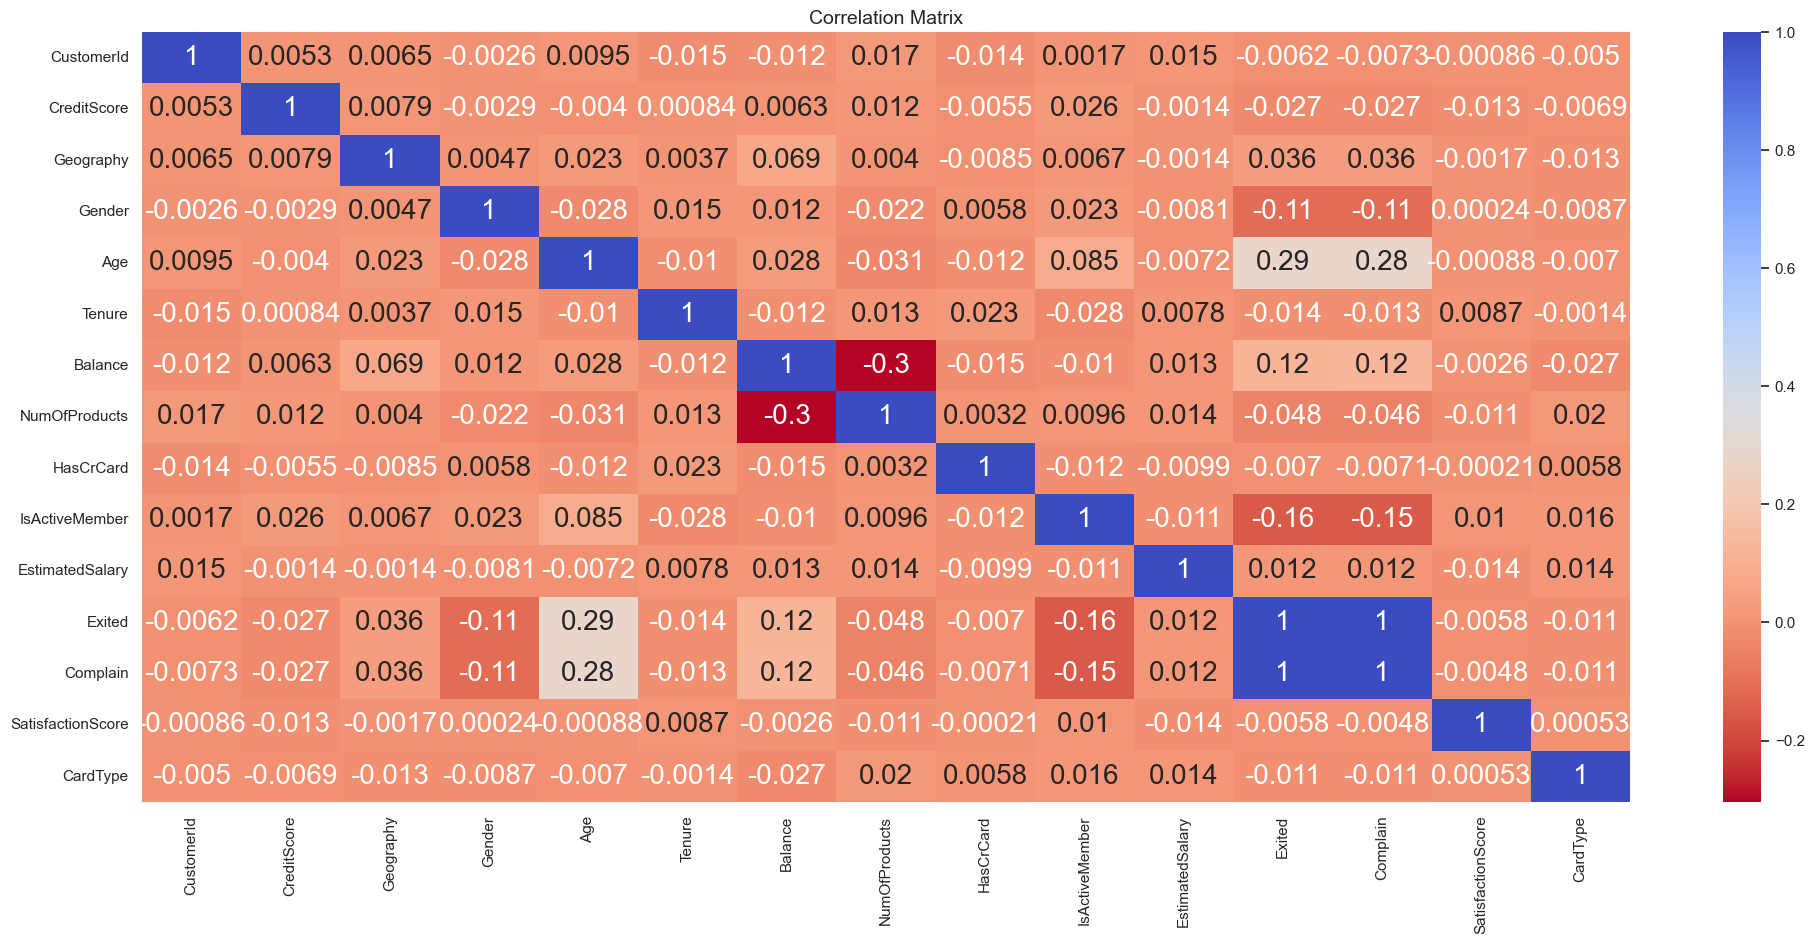

In [49]:
#Visualize correlation
f, ax1 = plt.subplots(figsize=(24,10))

corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot=True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix", fontsize=14)

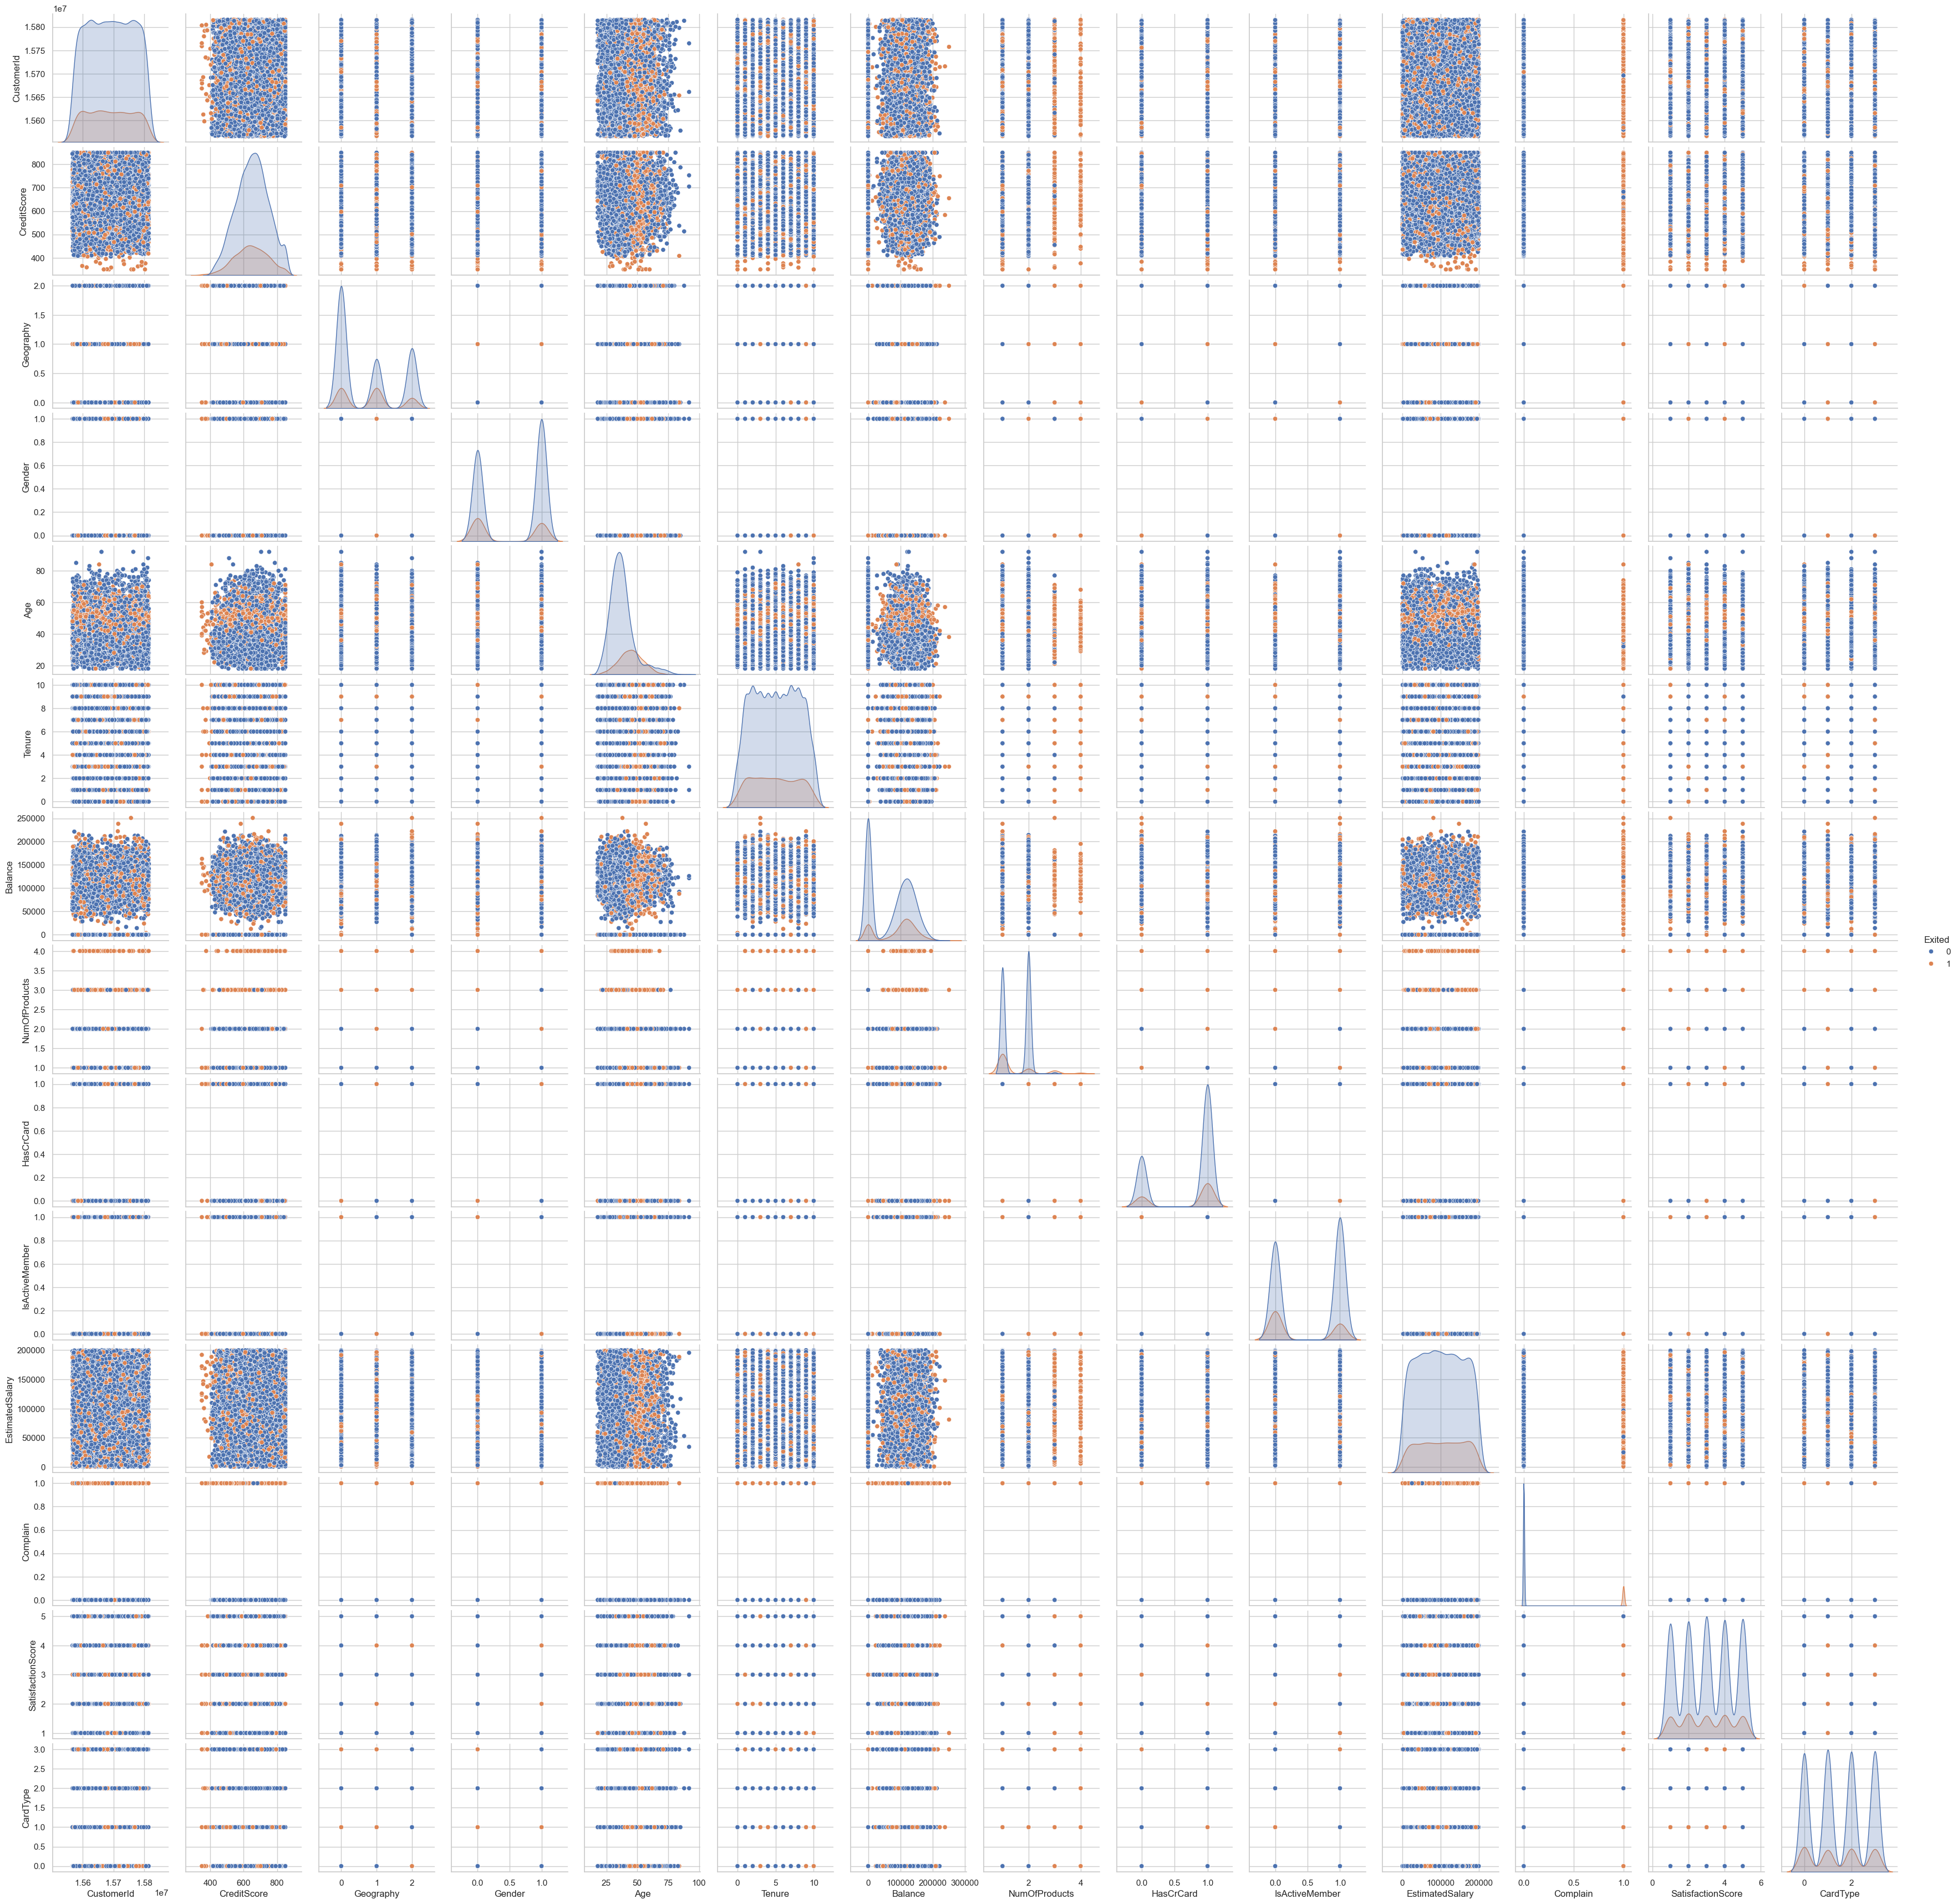

In [51]:
#Relationships between variables
sns.pairplot(data=data, hue="Exited")
plt.show()
%matplotlib inline

In [52]:
#Churn Rate
Churn_rate = 2038/ 10000 * 100
print('Churn Rate:',Churn_rate, '%')

Churn Rate: 20.380000000000003 %


In [58]:
# Calculate the total number of customers against num of products
Total_customers = data['NumOfProducts'].value_counts()
print(Total_customers)

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


In [68]:
# Calculate the number of churned customers per location
Churned_customers= data[data['Exited'] == 1]['NumOfProducts'].value_counts()
print(Churned_customers)

NumOfProducts
1    1409
2     349
3     220
4      60
Name: count, dtype: int64


In [70]:
# Calculate the churn rate per product
Churn_rate_per_product = (Churned_customers / Total_customers).fillna(0).sort_values(ascending=False)*100
print('Churn Rate per acc type:',Churn_rate_per_product)

Churn Rate per acc type: NumOfProducts
4    100.000000
3     82.706767
1     27.714398
2      7.603486
Name: count, dtype: float64


# Modeling

In [72]:
#Split train-test
sns.set_theme(style="white")

#Show X as features and y as target
X = data.drop(['Exited','CustomerId'], axis=1)
y = data['Exited']

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#Split data into train and test sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [74]:
#Sample
print(X_train.shape)

(8000, 13)


In [76]:
print(X_test.shape)

(2000, 13)


In [78]:
X_train.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
4791          709          2       1   35       2       0.00              2   
8881          744          0       1   29       1   43504.42              1   
6166          773          0       1   64       2  145578.28              1   
4473          646          1       0   29       4  105957.44              1   
854           675          0       0   57       8       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Complain  SatisfactionScore  \
4791          1               0        104982.39         0                  2   
8881          1               1        119327.75         0                  1   
6166          0               1        186172.85         0                  1   
4473          1               0         15470.91         0                  1   
854           0               1         95463.29         0                  3   

      CardType  
4791         1  
8881         2  
6166         3  
4473         2  
854          3

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV

In [85]:
#Balancing the classes using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# XGBoost Classifier

In [88]:
#EXTREME GRADIENT BOOSTING CLASSIFIER
!pip3 install xgboost
import xgboost as xgb
from xgboost import XGBClassifier


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
!pip3 install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\CarolD\AppData\Local\anaconda3\python.exe -m pip install --upgrade pip


In [104]:
#Create XGBoost Classifier and fit the model to the training data
best_xgboost_model = xgb.XGBClassifier()
best_xgboost_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
#Make predictions
from sklearn.metrics import accuracy_score
y_pred = best_xgboost_model.predict(X_test)
xgbprobabilities = best_xgboost_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score XGBoost:", accuracy_score(y_test, y_pred)*100, "%")
print("Probabilities", xgbprobabilities)

Accuracy score XGBoost: 99.85000000000001 %
Probabilities [[9.9997818e-01 2.1814811e-05]
 [9.9990153e-01 9.8443983e-05]
 [9.9998426e-01 1.5733362e-05]
 ...
 [9.9991781e-01 8.2218430e-05]
 [7.5340271e-05 9.9992466e-01]
 [9.9995500e-01 4.4980079e-05]]


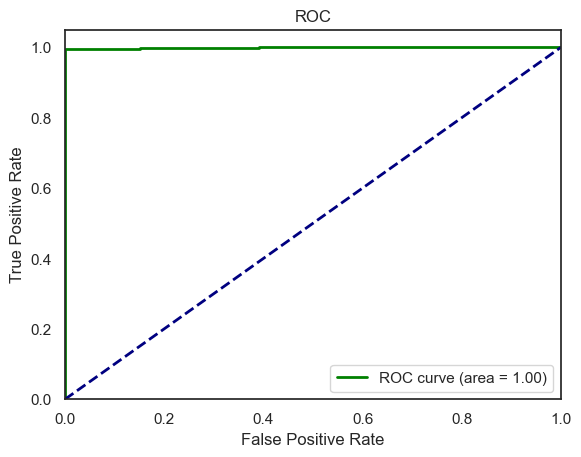

In [108]:
#XGBoost Model ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgbprobabilities[:, 1])
roc_auc = auc(fpr, tpr)
#Visualize the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

[[1591    1]
 [   2  406]]


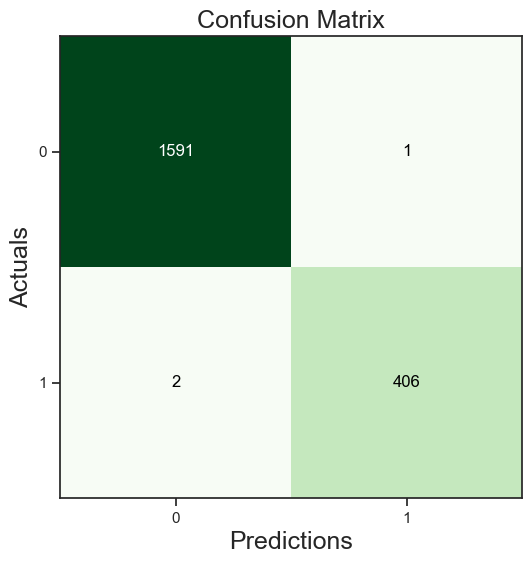

In [110]:
#CONFUSION MATRIX FOR XGBoost Classifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_xgb, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [112]:
#Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average ='macro')
recall = recall_score(y_test, y_pred, average ='macro')
f1 = f1_score(y_test, y_pred, average ='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(metrics.classification_report(y_test, y_pred))

Precision: 0.9981437523810406
Recall: 0.9972349492560844
F1 Score: 0.9976885515886392
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [114]:
#Set the number of folds for cross-validation
k_folds = 5
#Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_results = cross_val_score(best_xgboost_model, X_test, y_test, cv=kf, scoring='accuracy')
#Print the cross-validation results
print(f'Cross-validation results: {cv_results}')
print(f'Mean accuracy: {np.mean(cv_results)}')

Cross-validation results: [1.     0.9975 1.     0.9975 0.9975]
Mean accuracy: 0.9984999999999999


# Support Vector Machine

In [201]:
#Import libraries
from sklearn import svm
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [203]:
#Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [205]:
#Create SVM model Classifier
best_svm_model = svm.SVC(class_weight='balanced', probability=True)

In [207]:
#Feature selection
selector = SelectKBest(f_classif, k=13)
X_train_selected = selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

In [209]:
#Train the best model and make predictions
best_svm_model.fit(X_train_selected, y_train_resampled)
y_pred_svm = best_svm_model.predict(X_test_selected)

In [211]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
svmprobabilities = best_svm_model.predict_proba(X_test_selected)
print("Accuracy score SVM:", accuracy_score(y_test, y_pred_svm)*100, "%")
print("Probabilities", svmprobabilities)

Accuracy score SVM: 99.85000000000001 %
Probabilities [[9.99870998e-01 1.29001750e-04]
 [9.93714621e-01 6.28537911e-03]
 [9.99481256e-01 5.18743590e-04]
 ...
 [9.99686908e-01 3.13092033e-04]
 [1.02659993e-02 9.89734001e-01]
 [9.99752340e-01 2.47659717e-04]]


In [213]:
#Model evaluation ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svmprobabilities[:, 1])
roc_auc = auc(fpr, tpr)

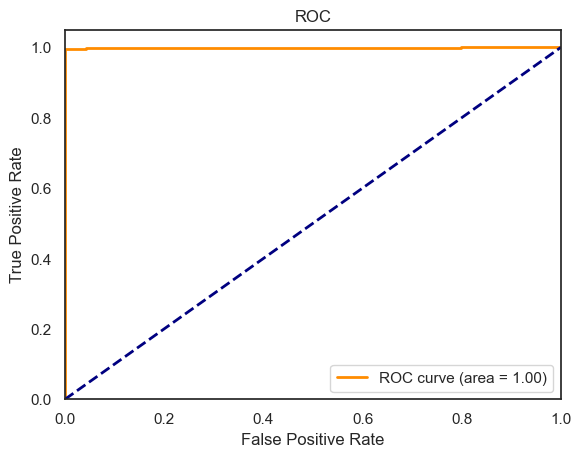

In [215]:
#Visualize the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [217]:
#Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_svm, average ='macro')
recall = recall_score(y_test, y_pred_svm, average ='macro')
f1 = f1_score(y_test, y_pred_svm, average ='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(metrics.classification_report(y_test, y_pred_svm))

Precision: 0.9981437523810406
Recall: 0.9972349492560844
F1 Score: 0.9976885515886392
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



[[1591    1]
 [   2  406]]


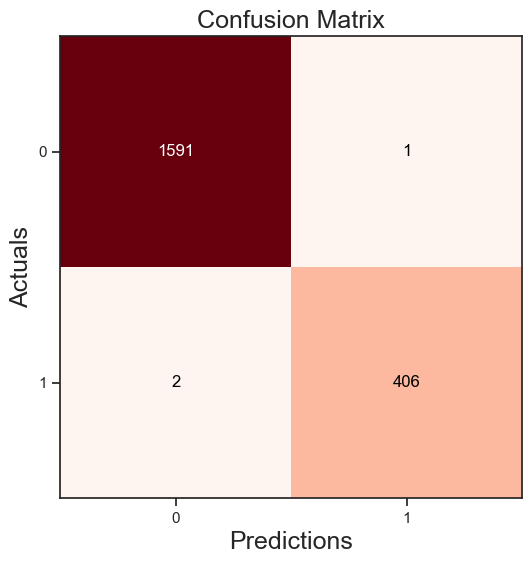

In [219]:
#CONFUSION MATRIX FOR SUPPORT VECTOR MACHINE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_svm, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [221]:
#Cross validating SVM model
from sklearn.model_selection import cross_val_score

In [223]:
#Creating an instance of the SVM model
cv_scores = cross_val_score(best_svm_model, X_test_selected, y_test, cv=5)

In [224]:
#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [1.     1.     0.995  1.     0.9975]
Mean CV Accuracy: 0.9984999999999999


# Random Forest Classifier

In [228]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.calibration import CalibratedClassifierCV
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)

#Create Random Forest Classifier
best_rf_model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

In [230]:
#Building the RandomForest model
best_rf_model = RandomForestClassifier()
best_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [232]:
#Model Evaluation
y_pred_rf = best_rf_model.predict(X_test)
probabilities = best_rf_model.predict_proba(X_test)[:, 1]

In [234]:
#Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy score RF:", accuracy_score(y_test, y_pred_rf)*100, "%")

Accuracy score RF: 99.85000000000001 %


In [236]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

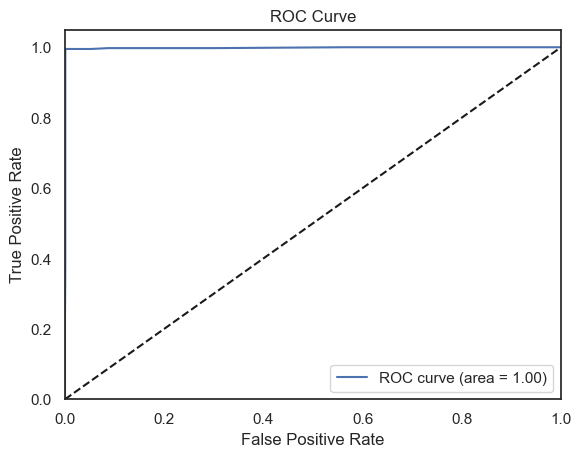

Probabilities [0.01 0.01 0.   ... 0.05 0.97 0.  ]


In [238]:
#Plot ROC Curve
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("Probabilities", probabilities)

In [240]:
#Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_rf, average ='macro')
recall = recall_score(y_test, y_pred_rf, average ='macro')
f1 = f1_score(y_test, y_pred_rf, average ='macro')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(metrics.classification_report(y_test, y_pred_rf))

Precision: 0.9981437523810406
Recall: 0.9972349492560844
F1 Score: 0.9976885515886392
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [242]:
#Cross-validation Scores
cv_scores = cross_val_score(best_rf_model, X_test, y_test, cv=5)
print("Cross-validation Scores:", cv_scores)

Cross-validation Scores: [1.     1.     0.995  1.     0.9975]


[[1591    1]
 [   2  406]]


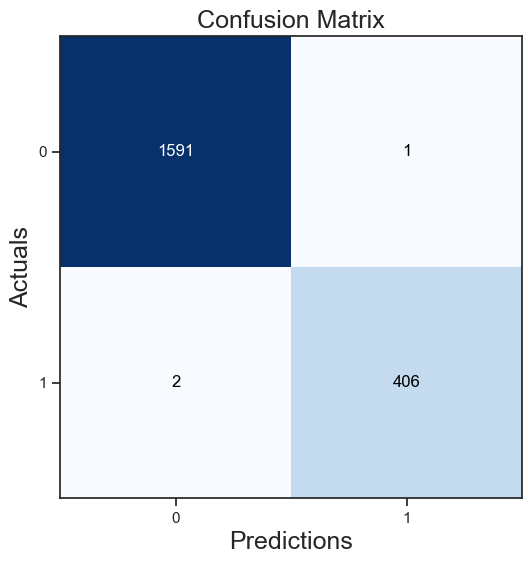

In [243]:
#Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm_rf, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

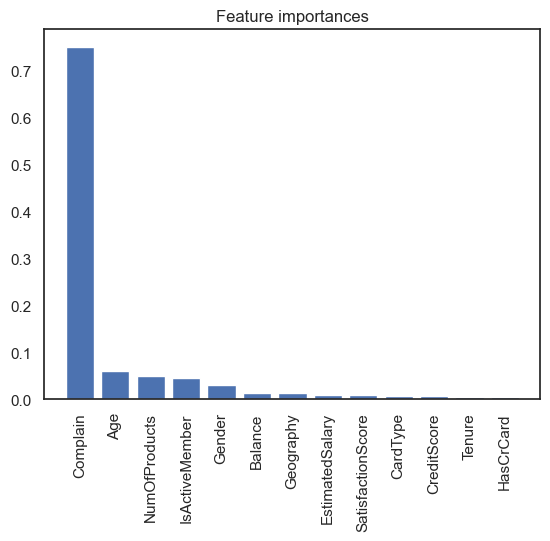

In [244]:
#RF Model Feature importance
importances = best_rf_model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Model testing

In [249]:
import numpy as np
import pickle
!pip install fastapi
!pip install fastapi uvicorn
from fastapi import FastAPI
from pydantic import BaseModel


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [251]:
import joblib

In [253]:
#Save the trained model to a file
joblib.dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [255]:
joblib.dump(best_svm_model, 'support_vector_machine_model.pkl')

['support_vector_machine_model.pkl']

In [257]:
joblib.dump(best_xgboost_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [259]:
#Load Random Forest model
rfmodel = joblib.load('random_forest_model.pkl')

In [261]:
svmmodel = joblib.load('support_vector_machine_model.pkl')

In [263]:
xgboostmodel = joblib.load('xgboost_model.pkl')

In [265]:
with open('random_forest_model.pkl', 'rb') as file:
    rfmodel = joblib.load(file)

In [267]:
#Initialize FastAPI app
app = FastAPI()

In [269]:
#Define input data structure
class data(BaseModel):
    CreditScore:float
    Geography: float
    Gender: float
    Age: float
    Tenure:float
    Balance: float
    NumOfProducts:float
    HasCrCard:float
    IsActiveMember:float
    EstimatedSalary:float
    Complain:float
    SatisfactionScore:float
    CardType:float

In [271]:
#Create a dictionary with the customer data
Customer_data={
    "CreditScore":502,
    "Geography":0,
    "Gender":0,
    "Age":42,
    "Tenure":8,
    "Balance":159700,
    "NumOfProducts":3,
    "HasCrCard":1,
    "IsActiveMember":0,
    "EstimatedSalary":114000,
    "Complain":1,
    "SatisfactionScore":3,
    "CardType":0
}

In [273]:
#Convert data into a DataFrame
Customer_df=pd.DataFrame(Customer_data,index=[0])

In [275]:
#Use the loaded Random Forest model to make predictions
RF_model_predicted_output=rfmodel.predict(Customer_df)

In [277]:
SVM_model_predicted_output=svmmodel.predict(Customer_df) 

In [279]:
XGB_model_predicted_output=xgboostmodel.predict(Customer_df)

In [281]:
#Random Forest Model Prediction
print(RF_model_predicted_output)

[1]


In [283]:
print(SVM_model_predicted_output)

[1]


In [285]:
print(XGB_model_predicted_output)

[1]


In [287]:
#Use the trained Random Forest model to predict the probability of each class
class_probabilitiesRF = best_rf_model.predict_proba(Customer_df)
class_probabilitiesSVM = best_svm_model.predict_proba(Customer_df)
class_probabilitiesXGB = best_xgboost_model.predict_proba(Customer_df)
 
#Classes are labeled as 0 and 1, where 1 represents churn
churn_probabilitiesRF = class_probabilitiesRF[:, 1]
churn_probabilitiesSVM = class_probabilitiesSVM[:, 1]
churn_probabilitiesXGB = class_probabilitiesXGB[:, 1]
 
#Print the predicted probabilities of churn
print("Predicted probabilities of churn:")
print('RF: ', churn_probabilitiesRF)
print('SVM:', churn_probabilitiesSVM)
print('XGBoost:', churn_probabilitiesXGB)

Predicted probabilities of churn:
RF:  [1.]
SVM: [0.59542475]
XGBoost: [0.998697]


The RF and XGBoost models are over-confident and could possibly falsely flag customers as probable to churn, therefore the recommended model is the SVM model as it generalizes well